In [ ]:
import os #import opetarion system
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
# import modules
from datetime import datetime
from datetime import timedelta
import os

import random
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
sns.set()

#DF JUTAAN

##Data Gather(5 Months)

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"andishafira79","key":"a11a32449b7a91c3aa639ad7601c392d"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download mkechinov/ecommerce-events-history-in-cosmetics-shop

Dataset URL: https://www.kaggle.com/datasets/mkechinov/ecommerce-events-history-in-cosmetics-shop
License(s): copyright-authors
100% 428M/430M [00:24<00:00, 21.7MB/s]
100% 430M/430M [00:24<00:00, 18.8MB/s]


In [ ]:
! unzip "ecommerce-events-history-in-cosmetics-shop"

Archive:  ecommerce-events-history-in-cosmetics-shop.zip
  inflating: 2019-Dec.csv            
  inflating: 2019-Nov.csv            
  inflating: 2019-Oct.csv            
  inflating: 2020-Feb.csv            
  inflating: 2020-Jan.csv            


In [ ]:
df_19_okt = pd.read_csv("2019-Oct.csv")
df_19_nov = pd.read_csv("2019-Nov.csv")
df_19_dec = pd.read_csv("2019-Dec.csv")
df_20_jan = pd.read_csv("2020-Jan.csv")
df_20_feb = pd.read_csv("2020-Feb.csv")
df_20_feb

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-02-01 00:00:01 UTC,cart,5844305,1487580006317032337,NaN,NaN,2.14,485174092,4be9643a-420b-4c6b-83dd-a15e772fbf7a
1,2020-02-01 00:00:03 UTC,view,5769925,1487580013841613016,NaN,kapous,4.22,594621622,a88baf11-9cd0-4362-bde4-1bfeed3f641d
2,2020-02-01 00:00:08 UTC,view,5817765,1487580008246412266,NaN,zeitun,11.03,495404942,3a569c8d-d848-4f09-a925-33f673d84c46
3,2020-02-01 00:00:11 UTC,view,5877033,1487580010100293687,NaN,milv,3.49,564814969,7feb39e5-bb7b-4b2b-a546-3e3b7c56326e
4,2020-02-01 00:00:12 UTC,cart,5814871,1487580008112194531,NaN,zinger,2.54,551205603,106a7c7f-7fa1-4463-8bec-0ea7b02191cb
...,...,...,...,...,...,...,...,...,...
4156677,2020-02-29 23:59:32 UTC,view,5885416,1487580005092295511,NaN,grattol,6.27,622082947,fb29909b-6ef5-4662-b4ee-288e73e5dc10
4156678,2020-02-29 23:59:39 UTC,cart,5550686,1487580008145748965,NaN,NaN,1.11,459705611,05d2add3-01f7-47ee-8364-27341673227f
4156679,2020-02-29 23:59:45 UTC,view,5850628,1602943681873052386,NaN,grattol,5.24,622090043,ab7d349f-db5d-4790-8ab1-31e5c894459d
4156680,2020-02-29 23:59:54 UTC,view,5716351,1487580010872045658,NaN,irisk,0.79,619841242,18af673b-7fb9-4202-a66d-5c855bc0fd2d


In [ ]:
all_data = pd.concat([df_19_okt,df_19_nov,df_19_dec,df_20_jan,df_20_feb])
all_data.shape

(20692840, 9)

In [ ]:
all_data.head(10)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,cart,5773203,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
1,2019-10-01 00:00:03 UTC,cart,5773353,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
2,2019-10-01 00:00:07 UTC,cart,5881589,2151191071051219817,NaN,lovely,13.48,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
3,2019-10-01 00:00:07 UTC,cart,5723490,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
4,2019-10-01 00:00:15 UTC,cart,5881449,1487580013522845895,NaN,lovely,0.56,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
5,2019-10-01 00:00:16 UTC,cart,5857269,1487580005134238553,NaN,runail,2.62,430174032,73dea1e7-664e-43f4-8b30-d32b9d5af04f
6,2019-10-01 00:00:19 UTC,cart,5739055,1487580008246412266,NaN,kapous,4.75,377667011,81326ac6-daa4-4f0a-b488-fd0956a78733
7,2019-10-01 00:00:24 UTC,cart,5825598,1487580009445982239,NaN,NaN,0.56,467916806,2f5b5546-b8cb-9ee7-7ecd-84276f8ef486
8,2019-10-01 00:00:25 UTC,cart,5698989,1487580006317032337,NaN,NaN,1.27,385985999,d30965e8-1101-44ab-b45d-cc1bb9fae694
9,2019-10-01 00:00:26 UTC,view,5875317,2029082628195353599,NaN,NaN,1.59,474232307,445f2b74-5e4c-427e-b7fa-6e0a28b156fe


In [ ]:
#all_data2 = all_data.drop(columns=['product_id','category_id','category_code','brand','user_session'])
#all_data2.head(3)

#Descriptive Statistics

In [ ]:
df_sorted_event_time = all_data.sort_values(by=['event_time'])
df_sorted_price = all_data.sort_values(by=['price'])

In [ ]:
#seperating timezone
all_data["timezone"]= all_data["event_time"].str.rsplit(" ", n=1,expand = True)[1]
all_data["event_time"]= all_data["event_time"].str.rsplit(" ", n=1,expand = True)[0]
all_data["event_time"]=pd.to_datetime(all_data["event_time"])

#creating date,time,hours,weekday,weeknum columns
all_data["date"]=all_data['event_time'].dt.date
all_data["time"]=all_data['event_time'].dt.time
all_data["month"]=all_data['event_time'].dt.month
all_data["hours"]=all_data['event_time'].dt.hour
all_data["weekday"]=all_data['event_time'].dt.weekday

#changing weekday to string and adding 'week_' prefix to weeknum
all_data['weekday']= all_data['weekday'].replace({0:'Mon',1:'Tues',2:'Wed',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'})
all_data['month']= all_data['month'].replace({10:'October',11:'November',12:'December',1:'January',2:'February'})

In [ ]:
all_data

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,timezone,date,time,month,hours,weekday
0,2019-10-01 00:00:00,cart,5773203,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,UTC,2019-10-01,00:00:00,October,0,Tues
1,2019-10-01 00:00:03,cart,5773353,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,UTC,2019-10-01,00:00:03,October,0,Tues
2,2019-10-01 00:00:07,cart,5881589,2151191071051219817,NaN,lovely,13.48,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9,UTC,2019-10-01,00:00:07,October,0,Tues
3,2019-10-01 00:00:07,cart,5723490,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,UTC,2019-10-01,00:00:07,October,0,Tues
4,2019-10-01 00:00:15,cart,5881449,1487580013522845895,NaN,lovely,0.56,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9,UTC,2019-10-01,00:00:15,October,0,Tues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4156677,2020-02-29 23:59:32,view,5885416,1487580005092295511,NaN,grattol,6.27,622082947,fb29909b-6ef5-4662-b4ee-288e73e5dc10,UTC,2020-02-29,23:59:32,February,23,Sat
4156678,2020-02-29 23:59:39,cart,5550686,1487580008145748965,NaN,NaN,1.11,459705611,05d2add3-01f7-47ee-8364-27341673227f,UTC,2020-02-29,23:59:39,February,23,Sat
4156679,2020-02-29 23:59:45,view,5850628,1602943681873052386,NaN,grattol,5.24,622090043,ab7d349f-db5d-4790-8ab1-31e5c894459d,UTC,2020-02-29,23:59:45,February,23,Sat
4156680,2020-02-29 23:59:54,view,5716351,1487580010872045658,NaN,irisk,0.79,619841242,18af673b-7fb9-4202-a66d-5c855bc0fd2d,UTC,2020-02-29,23:59:54,February,23,Sat


In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20692840 entries, 0 to 4156681
Data columns (total 15 columns):
 #   Column         Dtype         
---  ------         -----         
 0   event_time     datetime64[ns]
 1   event_type     object        
 2   product_id     int64         
 3   category_id    int64         
 4   category_code  object        
 5   brand          object        
 6   price          float64       
 7   user_id        int64         
 8   user_session   object        
 9   timezone       object        
 10  date           object        
 11  time           object        
 12  month          object        
 13  hours          int32         
 14  weekday        object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(3), object(9)
memory usage: 2.4+ GB


In [ ]:
all_data.describe()

,event_time,product_id,category_id,price,user_id,hours
count,20692840,2.069284e+07,2.069284e+07,2.069284e+07,2.069284e+07,2.069284e+07
mean,2019-12-16 05:44:37.495470080,5.484297e+06,1.554230e+18,8.534735e+00,5.215527e+08,1.308708e+01
min,2019-10-01 00:00:00,3.752000e+03,1.487580e+18,-7.937000e+01,4.654960e+05,0.000000e+00
25%,2019-11-08 13:35:44.500000,5.724650e+06,1.487580e+18,2.060000e+00,4.818306e+08,9.000000e+00
50%,2019-12-13 02:48:02,5.810720e+06,1.487580e+18,4.050000e+00,5.531297e+08,1.300000e+01
75%,2020-01-25 12:54:33,5.857864e+06,1.487580e+18,7.060000e+00,5.788573e+08,1.800000e+01
max,2020-02-29 23:59:59,5.932595e+06,2.242903e+18,3.277800e+02,6.220902e+08,2.300000e+01
std,NaN,1.305716e+06,1.691038e+17,1.938142e+01,8.744312e+07,5.478420e+00


In [ ]:
returned_orders=all_data[all_data['price']<0]['price'].count()
returned_orders_perc=returned_orders/(all_data['price'].count())

print("There are %2d returned orders which is %.5f of total orders." %(returned_orders,round(returned_orders_perc,5)))

There are 131 returned orders which is 0.00001 of total orders.


In [ ]:
# data preparation

# step 1: select customers who purchased
df_sales=all_data.loc[all_data.event_type=='purchase',:]

# step 2: drop "category_code", "brand", "product_id", "category_id", and "user_session"
df_sales=df_sales.drop(columns=['category_code','brand','product_id','category_id','user_session'])

# step 3: drop duplicates
df_sales=df_sales.drop_duplicates()

# step 4: convert "event_time" to DateTime format
df_sales['event_time']=pd.to_datetime(df_sales['event_time'],infer_datetime_format=True)

nullcolumns=df_sales.isnull().sum()
nullnumbers=len(nullcolumns[nullcolumns!=0])
print("After data selection and cleansing, the dataframe has {} rows, {} columns, and {} null value.\n".format(df_sales.shape[0],df_sales.shape[1],nullnumbers))
print("Shown below are the first 3 rows of the cleaned dataframe:\n")
display(df_sales.head(3))

<ipython-input-19-9f8ad1f9bcc1>:13: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_sales['event_time']=pd.to_datetime(df_sales['event_time'],infer_datetime_format=True)
<ipython-input-19-9f8ad1f9bcc1>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sales['event_time']=pd.to_datetime(df_sales['event_time'],infer_datetime_format=True)


After data selection and cleansing, the dataframe has 908776 rows, 10 columns, and 0 null value.

Shown below are the first 3 rows of the cleaned dataframe:



,event_time,event_type,price,user_id,timezone,date,time,month,hours,weekday
202,2019-10-01 00:06:35,purchase,5.32,474232307,UTC,2019-10-01,00:06:35,October,0,Tues
204,2019-10-01 00:06:35,purchase,2.86,474232307,UTC,2019-10-01,00:06:35,October,0,Tues
205,2019-10-01 00:06:35,purchase,2.38,474232307,UTC,2019-10-01,00:06:35,October,0,Tues


In [ ]:
display(df_sales.head(3))

,event_time,event_type,price,user_id,timezone,date,time,month,hours,weekday
202,2019-10-01 00:06:35,purchase,5.32,474232307,UTC,2019-10-01,00:06:35,October,0,Tues
204,2019-10-01 00:06:35,purchase,2.86,474232307,UTC,2019-10-01,00:06:35,October,0,Tues
205,2019-10-01 00:06:35,purchase,2.38,474232307,UTC,2019-10-01,00:06:35,October,0,Tues


In [ ]:
df_sales = df_sales.drop(columns=['time','timezone','hours','weekday'])

In [ ]:
# step 4: convert "event_time" to DateTime format
df_sales['event_time']=pd.to_datetime(df_sales['event_time'],infer_datetime_format=True)
display(df_sales.head(3))

<ipython-input-22-dd899239b637>:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_sales['event_time']=pd.to_datetime(df_sales['event_time'],infer_datetime_format=True)


,event_time,event_type,price,user_id,date,month
202,2019-10-01 00:06:35,purchase,5.32,474232307,2019-10-01,October
204,2019-10-01 00:06:35,purchase,2.86,474232307,2019-10-01,October
205,2019-10-01 00:06:35,purchase,2.38,474232307,2019-10-01,October


In [ ]:
display(df_sales.head(3))

,event_time,event_type,price,user_id,date,month
202,2019-10-01 00:06:35,purchase,5.32,474232307,2019-10-01,October
204,2019-10-01 00:06:35,purchase,2.86,474232307,2019-10-01,October
205,2019-10-01 00:06:35,purchase,2.38,474232307,2019-10-01,October


In [ ]:
#df_sales.to_csv("5_Month_EventHist_clean.csv")

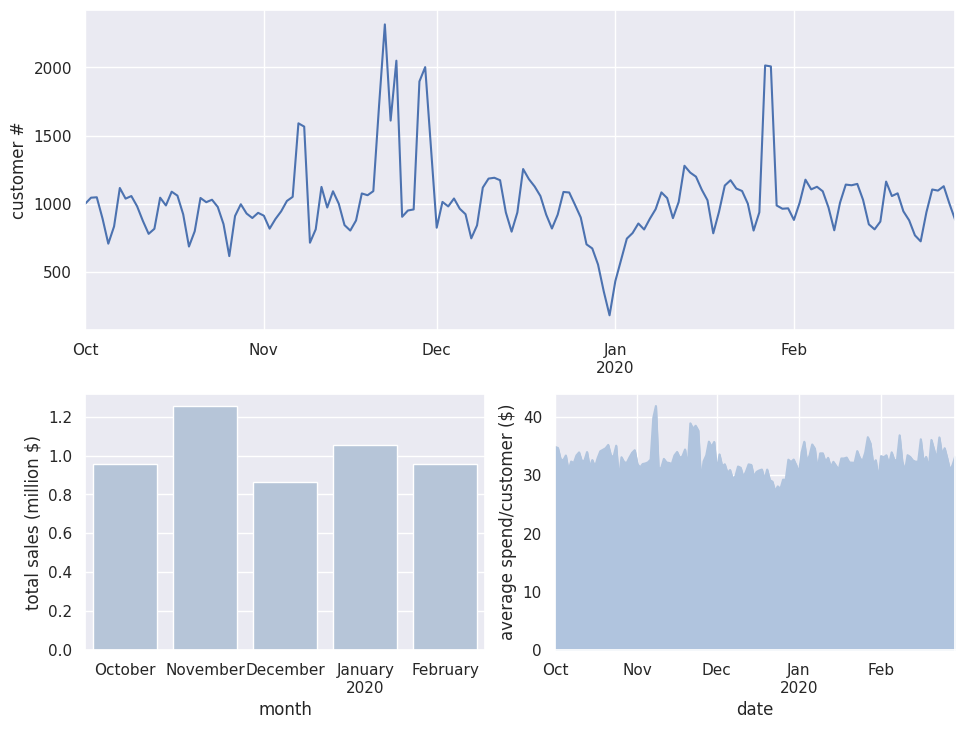

In [ ]:
# initial data exploration

plt.figure(figsize=(10,8))

# plot the number of customers each day
plt.axes([0.08, 0.4, 0.87, 0.4])
df_sales_n_user=df_sales.resample("D",on='event_time')['user_id'].nunique()
df_sales_n_user.plot(kind='line')
plt.xlabel('')
plt.ylabel('customer #')

# plot total sales/month
plt.axes([0.08,0,0.4,0.32])
a=df_sales.resample('M',on='event_time')['price'].sum().to_frame()
a['month']=["October","November","December","January\n2020", "February"]
a['price']=a['price']/1000000
sns.barplot(x='month',y='price',data=a,color="lightsteelblue")
plt.xlabel('month')
plt.ylabel('total sales (million $)')

# plot average spend/customer
plt.axes([0.55,0,0.4,0.32])
df_sales_p_day=df_sales.resample('D',on='event_time')['price'].sum()
df_sales_spent=df_sales_p_day/df_sales_n_user
df_sales_spent.plot(kind='area',color="lightsteelblue")
plt.xlabel('date')
plt.ylabel('average spend/customer ($)');

In [ ]:
# group the data by "user_id", and calcualte each customer's recency, frequency, and monetary value

# step 1: calculate "Recency", set Feb 2020 as the reference month, and use "month" as the unit
d={"October":4,"November":3,"December":2,"January":1,"February":0}
df_sales.loc[:,'Recency']=df_sales['month'].map(d)
df_R=df_sales.groupby('user_id')['Recency'].min().reset_index().rename(columns={"0":"Recency"})

# step 2: calculate "Frequency"
df_F=df_sales.groupby('user_id')['event_type'].count().reset_index().rename(columns={"event_type":"Frequency"})

# step 3: calculate "Monetary"
df_M=df_sales.groupby('user_id')['price'].sum().reset_index().rename(columns={"price":"Monetary"})

# step 4: merge "Recency", "Frequency", and "Monetary"
df_RF=pd.merge(df_R,df_F,on='user_id')
df_RFM=pd.merge(df_RF,df_M,on='user_id')

# step 5: remove outliers before K-Means clustering
conditions=np.abs(stats.zscore(df_RFM.loc[:,['Recency','Frequency','Monetary']]) < 3).all(axis=1)
df_RFM2=df_RFM.loc[conditions,:]

df_RFM2.head(3)

,user_id,Recency,Frequency,Monetary
0,9794320,3,2,7.72
1,10079204,3,2,25.81
2,10280338,0,19,63.29


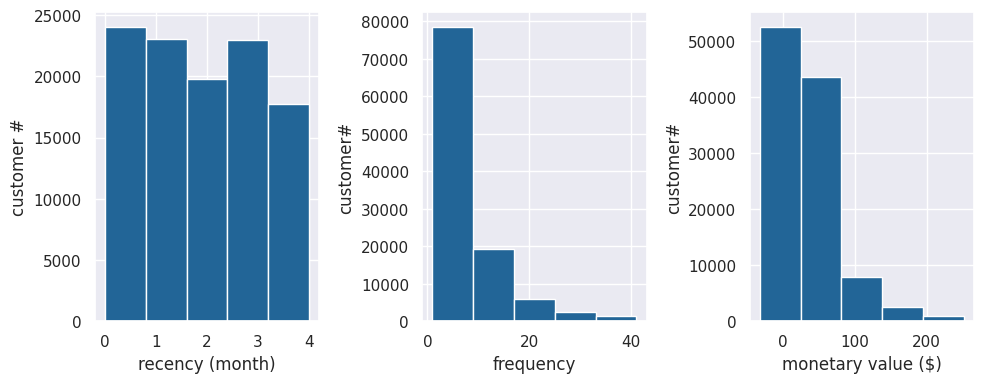

In [ ]:
# visualize the distribution of "Recency", "Frequency", and "Monetary"
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(10,4))

# plot "Recency"
ax1.hist(df_RFM2['Recency'],bins=5,color='#226597')
ax1.set_xticks(np.arange(0,5,1))
ax1.set_xlabel('recency (month)')
ax1.set_ylabel('customer #')

# plot "Frequency"
ax2.hist(df_RFM2['Frequency'],bins=5,color='#226597')
ax2.set_xlabel('frequency')
ax2.set_ylabel('customer#')

# plot "Monetary"
ax3.hist(df_RFM2['Monetary'],bins=5,color='#226597')
ax3.set_xlabel('monetary value ($)')
ax3.set_ylabel('customer#')

plt.tight_layout()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

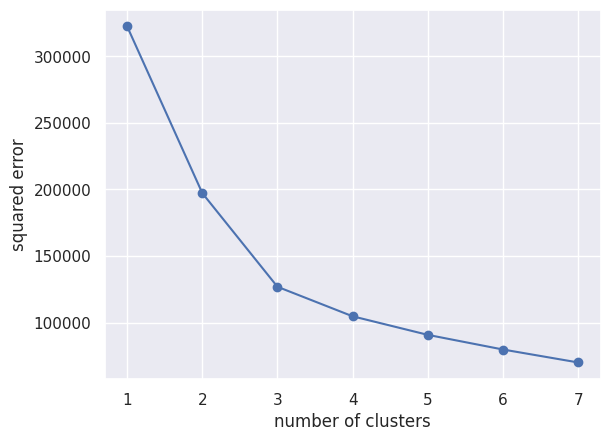

In [ ]:
# k-means clustering: using recency, frequency, and monetary as clustering varaibles

# step 1: standardize data
df_RFM3=df_RFM2.drop(columns=['user_id'])
X = StandardScaler().fit_transform(df_RFM3)

# step 2: find the optimal number of clusters
SSE=[]
for i in range(1,8,1):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)
sns.set()
plt.plot(range(1,8,1),SSE,marker='o')
plt.xlabel('number of clusters')
plt.ylabel('squared error');

In [ ]:
ax = fig.add_subplot(projection='3d')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


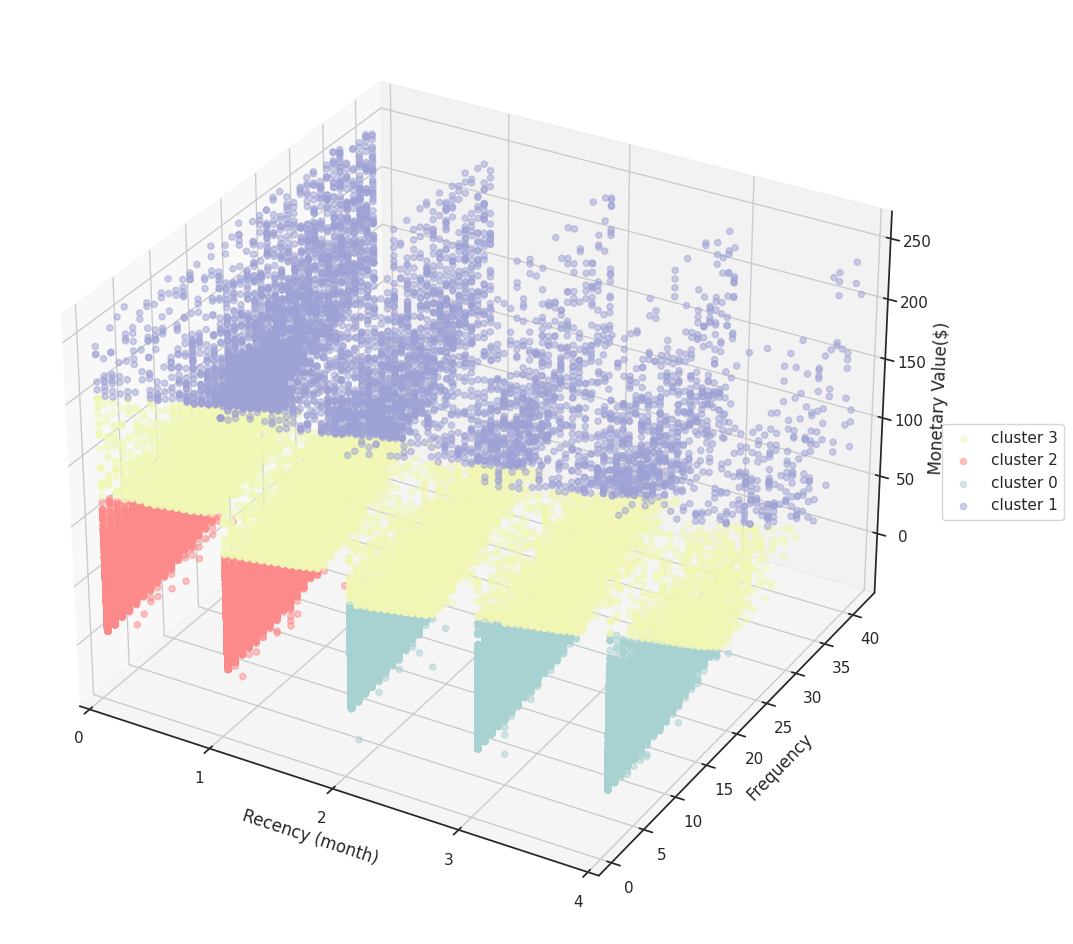

In [ ]:
# k-means clustering: using recency, frequency, and monetary as clustering varaibles

# step 3: group customers into 4 clusters
random.seed(8)
km=KMeans(n_clusters=4,random_state=42)
km.fit(X)
random.seed(8)
pred=km.predict(X)
df_RFM2=df_RFM2.assign(clusters=pred)

# step 4: visualize the 4 clusters

# step 4_1: data preparation
R=[]
F=[]
M=[]
mycolors=["#F1F7B5", "#FD8A8A", "#A8D1D1","#9EA1D4"]
cluster_orders=[3,2,0,1]
for i in [0,1,2,3]:
    R.append(df_RFM2.loc[df_RFM2.clusters==cluster_orders[i],'Recency'].values.tolist())
    F.append(df_RFM2.loc[df_RFM2.clusters==cluster_orders[i],'Frequency'].values.tolist())
    M.append(df_RFM2.loc[df_RFM2.clusters==cluster_orders[i],'Monetary'].values.tolist())

# step 4_2: 3D scatter plot
fig=plt.figure(figsize=(14,12))
ax = fig.add_subplot(projection='3d')
#ax=Axes3D(fig)
for i in [0,1,2,3]:
  ax.scatter(R[i], F[i], M[i], c=mycolors[i], marker='o',alpha=0.5,label='cluster '+str(cluster_orders[i]))
ax.set_xlabel('Recency (month)')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary Value($)')
ax.set_xlim(0,4)
ax.set_xticks(list(range(5)))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

<ipython-input-47-0bf71c46cc21>:7: FutureWarning: The provided callable <function median at 0x7fd62a743400> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df_RFM3=df_RFM2.groupby('segments').agg(Recency=('Recency',np.median),Frequency=('Frequency',np.median),MonetarySum=('Monetary',np.sum),size=("clusters",'size'))
<ipython-input-47-0bf71c46cc21>:7: FutureWarning: The provided callable <function median at 0x7fd62a743400> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df_RFM3=df_RFM2.groupby('segments').agg(Recency=('Recency',np.median),Frequency=('Frequency',np.median),MonetarySum=('Monetary',np.sum),size=("clusters",'size'))
<ipython-input-47-0bf71c46cc21>:7: FutureWarning: The provided callable <function sum at 0x7fd63c312dd0>

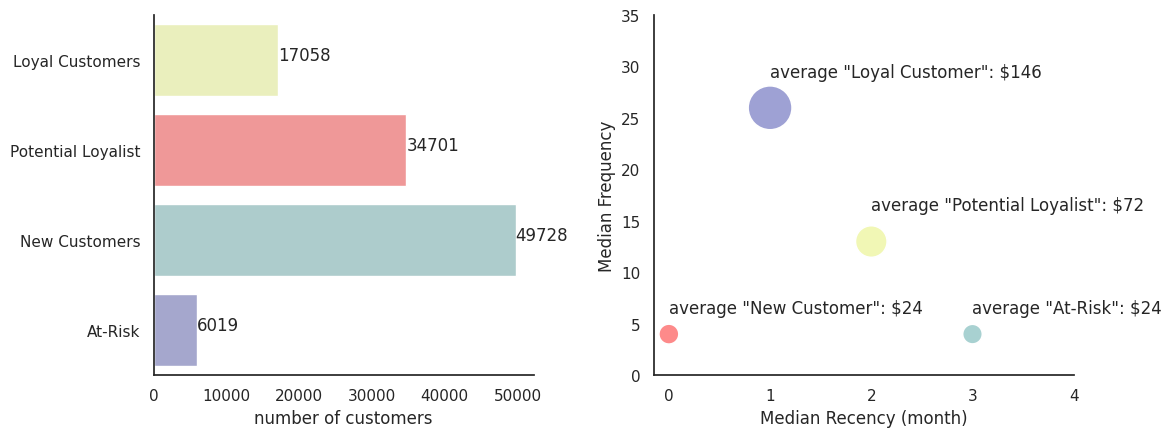

In [ ]:
# replace k-means cluster names with more meaningful names
d1={0:"New Customers", 2:"Potential Loyalist", 1: "At-Risk", 3:"Loyal Customers"}
df_RFM2.loc[:,"segments"]=df_RFM2.loc[:,"clusters"].map(d1)

# calculate the number of customers, median recency, median frequency,
# and average customer spend in each customer segment
df_RFM3=df_RFM2.groupby('segments').agg(Recency=('Recency',np.median),Frequency=('Frequency',np.median),MonetarySum=('Monetary',np.sum),size=("clusters",'size'))
df_RFM3.loc[:,'Sales/Customer']=round(df_RFM3.loc[:,'MonetarySum']/df_RFM3.loc[:,'size'])
df_RFM3=df_RFM3.astype({'Sales/Customer':int}).reset_index()

# visualize
plt.figure(figsize=(10,4))
seg_names=['Loyal Customers','Potential Loyalist','New Customers','At-Risk']

# plot the number of customers in each segment
sns.set_style("white")
plt.axes([0, 0, 0.38, 0.9])
seg=df_RFM2.groupby('segments').size().to_frame().rename(columns={0:'number of customers'}).reset_index()
sns.barplot(x='number of customers',y='segments',data=seg,order=seg_names,palette=mycolors)
for i in [0,1,2,3]:
    number=int(seg.loc[seg.segments==seg_names[i],'number of customers'])
    x_pos=round(number,-2)
    plt.text(x_pos,i,number)
plt.ylabel("")
sns.despine()

# plot recency, frequency, and average spend/customer of the 4 segments
plt.axes([0.5,0,0.42,0.9])
sns.scatterplot(x='Recency',y='Frequency',hue='segments',hue_order=seg_names,palette=mycolors,size='Sales/Customer',sizes=(200,1000),legend=False,data=df_RFM3)
plt.ylim(0,35)
plt.xticks(list(range(5)))
plt.text(1,29,'average "Loyal Customer": $146')
plt.text(2,16,'average "Potential Loyalist": $72')
plt.text(0,6,'average "New Customer": $24')
plt.text(3,6,'average "At-Risk": $24')
plt.xlabel('Median Recency (month)')
plt.ylabel('Median Frequency')
sns.despine()

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics import mutual_info_score, adjusted_rand_score

In [ ]:
# Calculate clustering metrics
silhouette = silhouette_score(X, km.labels_)
db_index = davies_bouldin_score(X, km.labels_)
ch_index = calinski_harabasz_score(X, km.labels_)
#ari = adjusted_rand_score(df_RFM3.target, km.labels_)
#mi = mutual_info_score(df_RFM3.target, km.labels_)

# Print the metric scores
print(f"Silhouette Score: {silhouette:.2f}")
print(f"Davies-Bouldin Index: {db_index:.2f}")
print(f"Calinski-Harabasz Index: {ch_index:.2f}")
#print(f"Adjusted Rand Index: {ari:.2f}")
#print(f"Mutual Information (MI): {mi:.2f}")

Silhouette Score: 0.40
Davies-Bouldin Index: 1.04
Calinski-Harabasz Index: 74525.21
